**ДЗ регрессия**

Скачиваем данные с кагла:

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imakash3011/rental-bike-sharing")

print("Path to dataset files:", path)

100%|██████████| 286k/286k [00:00<00:00, 614kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/imakash3011/rental-bike-sharing/versions/1


Проанализируем входные данные и разделим их по двум множествам при помощи метода кроссвалидации:

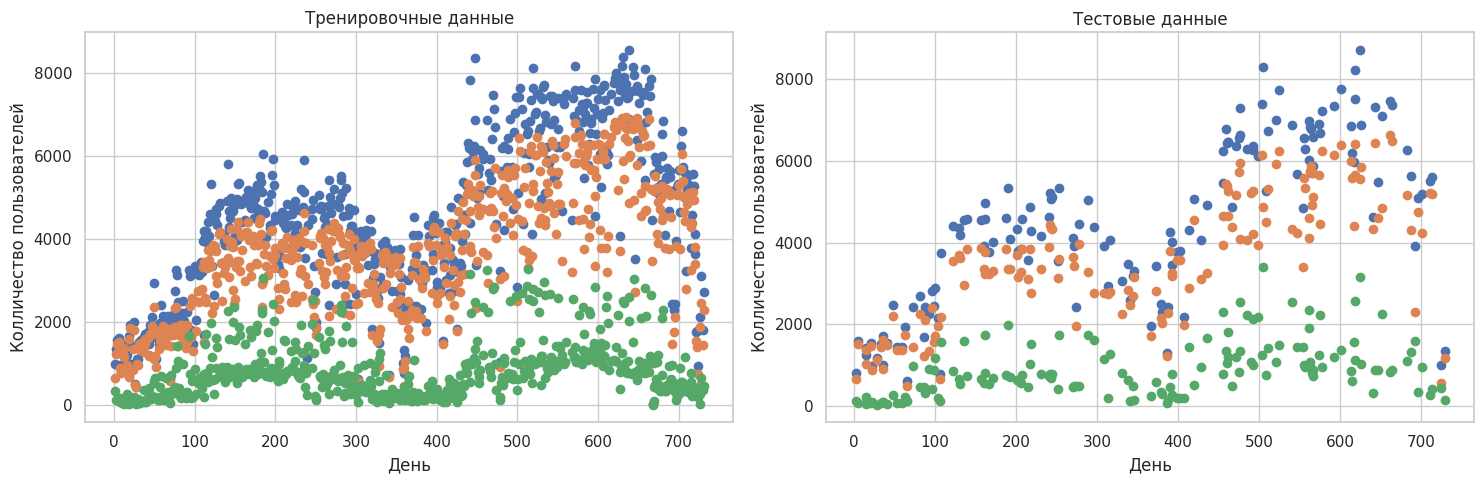

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

path = kagglehub.dataset_download("imakash3011/rental-bike-sharing")

df = pd.read_csv("/root/.cache/kagglehub/datasets/imakash3011/rental-bike-sharing/versions/1/day.csv")

#sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)


fig, axes  = plt.subplots(1, 2)
X = df[['instant']]
y2 = df[['registered']]
y3 = df[['casual']]
y = df[['cnt']]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]
    y3_train, y3_test = y3.iloc[train_index], y3.iloc[test_index]


axes[0].scatter(X_train, y_train)
axes[0].scatter(X_train, y2_train)
axes[0].scatter(X_train, y3_train)
axes[1].scatter(X_test, y_test)
axes[1].scatter(X_test, y2_test)
axes[1].scatter(X_test, y3_test)


axes[0].set_title('Тренировочные данные')
axes[0].set_xlabel('День')
axes[0].set_ylabel('Колличество пользователей')
axes[1].set_title('Тестовые данные')
axes[1].set_xlabel('День')
axes[1].set_ylabel('Колличество пользователей')

fig.set_size_inches(15, 5)
plt.tight_layout()

plt.show()



Построим матрицу карреляции для всех данных в качестве анализа

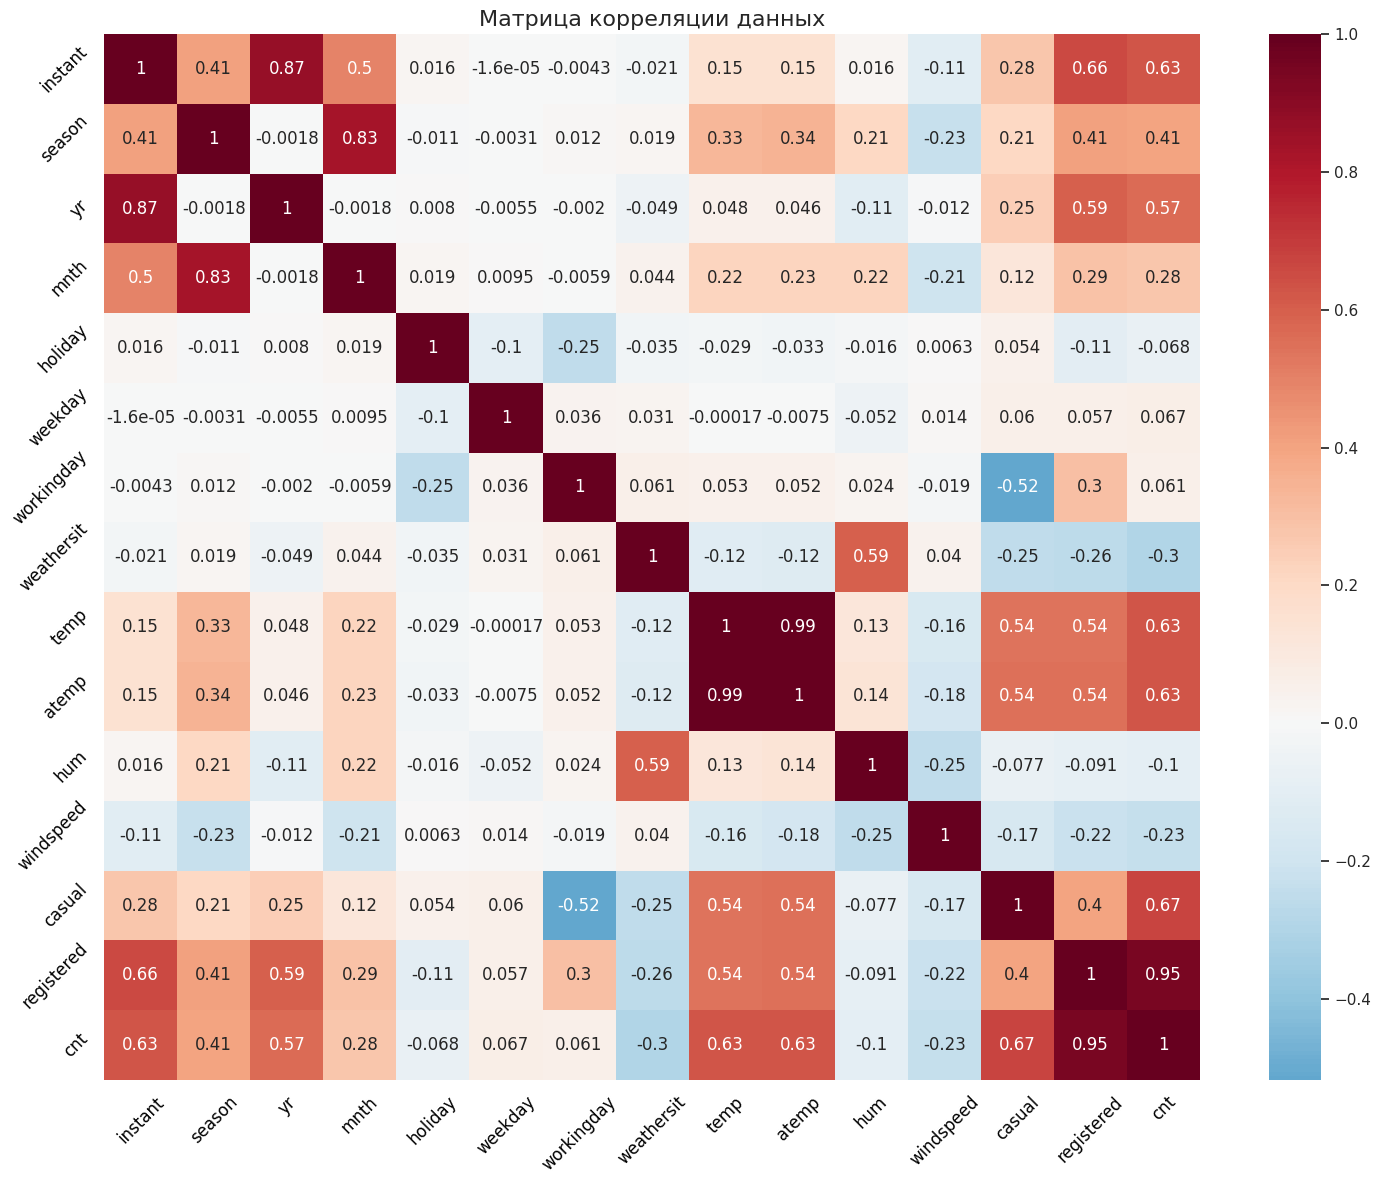

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



df = pd.read_csv("/root/.cache/kagglehub/datasets/imakash3011/rental-bike-sharing/versions/1/day.csv")
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(15, 12))
sns.set(style="darkgrid")
sns.heatmap(corr_matrix, xticklabels=df.corr(numeric_only=True).columns, yticklabels = df.corr(numeric_only=True).columns, cmap='RdBu_r', center=0, annot=True)

plt.title('Матрица корреляции данных', fontsize=16)
plt.xticks(rotation=45, fontsize=12, fontweight='normal', color='black')
plt.yticks(rotation=45, fontsize=12, fontweight='normal', color='black')
plt.tight_layout()

Проверим нет ли у нас пробелов в данных

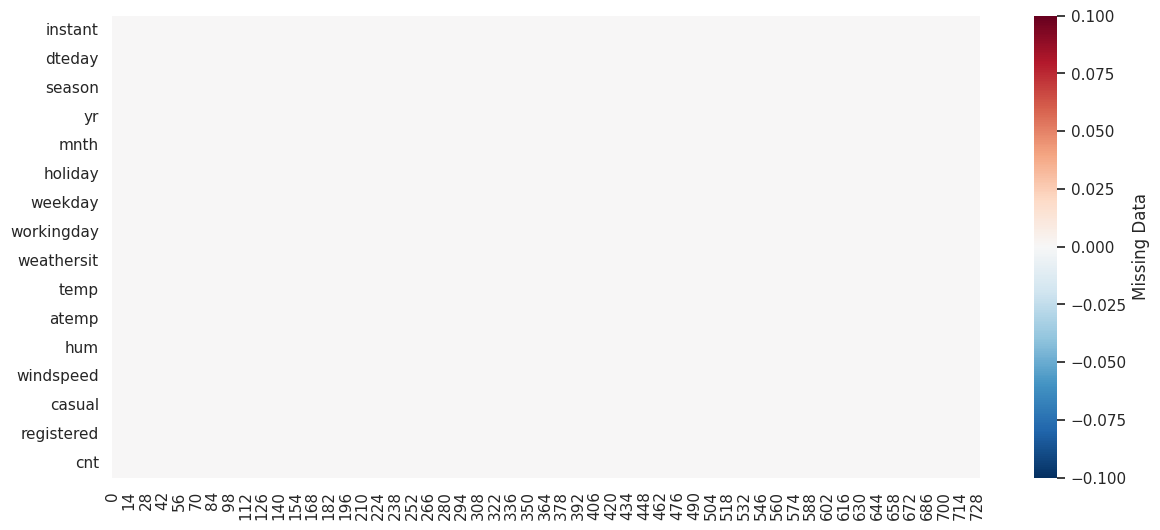

In [15]:
missing_data = df.isna()

plt.figure(figsize=(14,6))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(missing_data.isna().transpose(), cmap='RdBu_r', cbar_kws={'label': 'Missing Data'})
plt.show()

Обучаем нашу модель на тренировочных данных и построим к ним график лин. регресии:

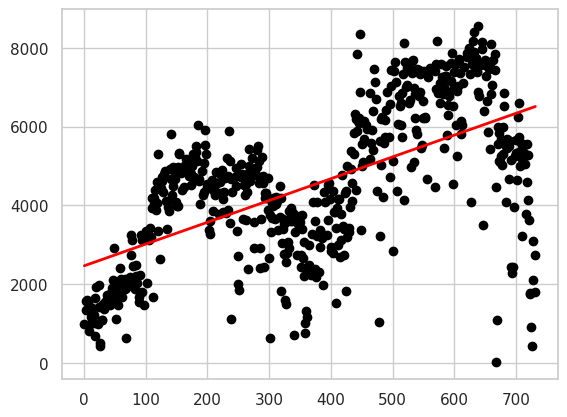

In [21]:
lig_reg = LinearRegression()

lig_reg.fit(X_train, y_train)

y_trained = lig_reg.predict(X_train)

plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, y_trained, color='red', linewidth=2)
plt.show()

Найдем коэффициенты w0 и w1:

In [ ]:
w1 = lig_reg.coef_
w0 = lig_reg.intercept_
print('Веса всех признаков (w1): ', lig_reg.coef_)
print('Свободный коэффицент уравнения w0:', lig_reg.intercept_)


Веса всех признаков (w1):  [[5.53910194]]
Свободный коэффицент уравнения w0: [2461.71721762]


Построим график линейной регресси для тестовых данных:

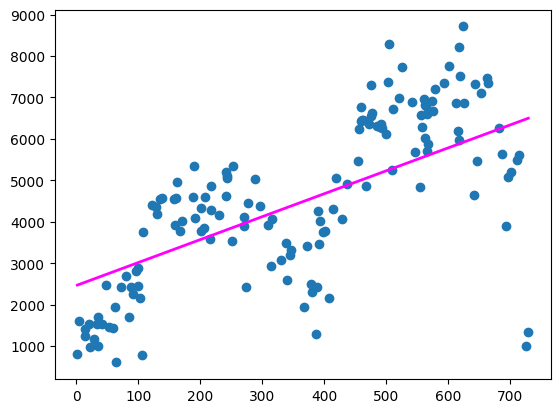

In [ ]:
y_pred = lig_reg.predict(X_test)


plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='magenta', linewidth=2);
plt.show()

Оценка успешности предсказания модели:

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 1152.11525815904
Mean Squared Error: 1997875.914003143
R2 score: 0.4924568147684001


**ВЫВОД:**
1. Качество модели (R² = 0.49)
R² (коэффициент детерминации) = 0.49 означает, что модель объясняет 49% дисперсии данных.
Это средний результат: модель улавливает лишь половину закономерностей. В реальных задачах значение R² > 0.6 считается приемлемым.
2. Ошибки предсказания
MAE (Mean Absolute Error) = 1152.1:
Модель в среднем ошибается на ±1152 аренды велосипедов в день.
Для бизнеса это может быть значительной погрешностью (например, если среднее значение cnt = 5000, ошибка составляет 23%).
3. MSE (Mean Squared Error) = 1,997,876:
Квадратичная ошибка усиливает влияние выбросов. Высокое MSE говорит о наличии аномальных значений или неучтенных факторов.